# 线性回归
## 1、线性拟合

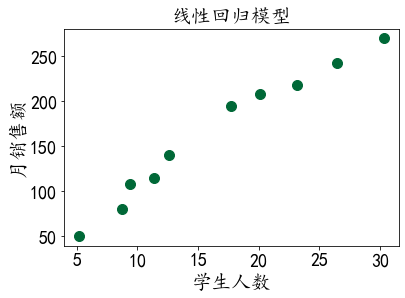

In [1]:
# 示例1 coding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("students_and_sales.csv")
x = data['students'].values
y = data['sales'].values

X = x.reshape(-1, 1) 
Y = y.reshape(-1, 1)
#新数组的shape属性应该要与原来数组的一致，即新数组元素数量与原数组元素数量要相等。
#一个参数为-1时，那么reshape函数会根据另一个参数的维度计算出数组的另外一个shape属性值。

plt.rcParams['font.sans-serif'] = ['KaiTi']
# 绘出已知样本的散点图
plt.scatter(X, Y, color='#006837', s=100)
#plt.plot(X, Y, 'k.')
# 绘出预测直线
# 绘图设置
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
plt.title('线性回归模型', size=20)
plt.xlabel('学生人数', size=20)
plt.ylabel('月销售额', size=20)
plt.show()

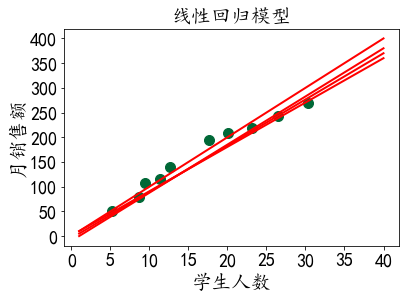

In [2]:
#示例2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("students_and_sales.csv")
x = data['students'].values
y = data['sales'].values

X = x.reshape(-1, 1) 
Y = y.reshape(-1, 1)
#新数组的shape属性应该要与原来数组的一致，即新数组元素数量与原数组元素数量要相等。
#一个参数为-1时，那么reshape函数会根据另一个参数的维度计算出数组的另外一个shape属性值。

plt.rcParams['font.sans-serif'] = ['KaiTi']
# 绘出已知样本的散点图
plt.scatter(X, Y, color='#006837', s=100)
plt.plot([1, 40], [10, 360], color='r', linestyle='-', linewidth=2)
plt.plot([1, 40], [5, 370], color='r', linestyle='-', linewidth=2)
plt.plot([1, 40], [0, 380], color='r', linestyle='-', linewidth=2)
plt.plot([1, 40], [10, 400], color='r', linestyle='-', linewidth=2)

# 绘出预测直线
# 绘图设置
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
plt.title('线性回归模型', size=20)
plt.xlabel('学生人数', size=20)
plt.ylabel('月销售额', size=20)
plt.show()

(10,)
(10, 1)
(10, 2)
[[ 5.2]
 [20.1]
 [12.6]
 [26.5]
 [17.7]
 [ 8.7]
 [11.4]
 [23.2]
 [30.3]
 [ 9.4]]
[[ 1.   5.2]
 [ 1.  20.1]
 [ 1.  12.6]
 [ 1.  26.5]
 [ 1.  17.7]
 [ 1.   8.7]
 [ 1.  11.4]
 [ 1.  23.2]
 [ 1.  30.3]
 [ 1.   9.4]]
<class 'numpy.ndarray'>


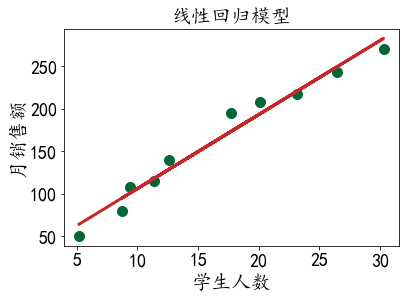

In [8]:
# 示例3：最小二乘求解
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 可视化结果
def visualization(x, y, y_predict):
# 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['KaiTi']
    # 绘出已知样本的散点图
    plt.scatter(x, y, color='#006837', s=100)
    # 绘出预测直线
    plt.plot(x, y_predict, color='#c62828', linewidth=3)
    # 绘图设置
    plt.xticks(fontproperties='Times New Roman', size=18)
    plt.yticks(fontproperties='Times New Roman', size=18)
    plt.title('线性回归模型', size=20)
    plt.xlabel('学生人数', size=20)
    plt.ylabel('月销售额', size=20)
    plt.show()


# 最小二乘法求解
def least_square(X, Y):
    B = X.T.dot(Y)  ## dot函数同矩阵乘法，T转置
    #print(type(X))
    A = np.linalg.inv(X.T.dot(X))
    theta = A.dot(B)
    return X.dot(theta)


def main():
    # 用pandas读取csv
    data = pd.read_csv("students_and_sales.csv")
    x = data['students'].values
    y = data['sales'].values
    Y = y.reshape(-1, 1)
    # 增加全1项
    ones = np.ones((len(x), 1))
    #print(x.shape)
    x = x.reshape(-1, 1)
    #print(x.shape)
    X = np.hstack((ones, x))
    # 最小二乘法求解
    #print(X.shape)
    #print(x)
    #print(X)
    Y_hat = least_square(X, Y)
    # 可视化结果
    visualization(x, y, Y_hat)


if __name__ == '__main__':
    main()

In [14]:
# T运算
a=np.array([[1,2],[3,4],[5,6]])
print(a)
print(a.T)

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


In [17]:
# dot运算
b=np.array([[1,2,3],[3,4,5]])
print(b)
print(b.dot(a))

[[1 2 3]
 [3 4 5]]
[[22 28]
 [40 52]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


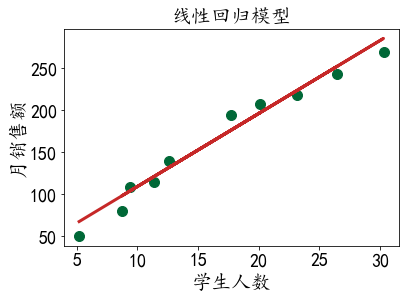

In [32]:
# 示例4：
# 梯度下降法求解 SGDRegressor
# linear regression求解
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi']

# 可视化拟合结果
def visualization_fitting(x, y, y_predict):
    # 绘出已知样本的散点图
    plt.scatter(x, y, color='#006837', s=100)
    # 绘出预测直线
    plt.plot(x, y_predict, color='#c62828', linewidth=3)
    # 绘图设置
    plt.xticks(fontproperties='Times New Roman', size=18)
    plt.yticks(fontproperties='Times New Roman', size=18)
    plt.title('线性回归模型', size=20)
    plt.xlabel('学生人数', size=20)
    plt.ylabel('月销售额', size=20)
    # 显示图
    plt.show()

def main():
    # 用numpy读取csv
    points = np.genfromtxt("students_and_sales.csv", encoding='utf-8', delimiter=",", skip_header=1, usecols=(1, 2))
    #points = np.genfromtxt("students_and_sales.csv", encoding='utf-8', delimiter=',', skip_header=1)
    
    # 提取points中的两列数据，分别作为x，y
    x = points[:, 0]
    y = points[:, 1]
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #随机梯度下降
    model = linear_model.SGDRegressor(loss='squared_loss', max_iter=100)  #SGDRegressor随机梯度下降进行线性回归
    #model = linear_model.LinearRegression()  #线性回归
    model.fit(x, y)
    #print("W0=", model.intercept_)
    #print("W1=", model.coef_)
    y_hat = model.predict(x) 
    
    
  # 可视化拟合结果
    visualization_fitting(x, y, y_hat)
    

if __name__ == '__main__':
    main()

9.54373661438035 0.5175847289580882 [31415.1, 27357.939140287046, 23828.316471643157, 20757.638001423384, 18086.228780020312, 15762.173188101486, 13740.306017344108, 11981.334737502508, 10451.07589209683, 9119.790782967279, 7961.607533501246, 6954.018299008919, 6077.441853119797, 5314.843049579029, 4651.401764129153, 4074.224882750436, 3572.0957390885387, 3135.2561316793212, 2755.2166847308645, 2424.591867046517, 2136.9564628750186, 1886.7207053666966, 1669.0216460007043, 1479.62864887533, 1314.8611732535933, 1171.5172465641538, 1046.8112378141009, 938.3197221127523, 843.9343842468852, 761.8210460435346, 690.3840212651382, 628.2351053161594, 574.1665971124453, 527.1278288249484, 486.2047473808686, 450.6021509125967, 419.62823494064685, 392.68114796374533, 369.23729517970895, 348.8411630336267, 331.0964668453551, 315.65844948083566, 302.22718140092474, 290.541731882037, 280.37509813310066, 271.5297937621476, 263.83401085955256, 257.13828111251, 251.31257106341158, 246.24375506187425, 24

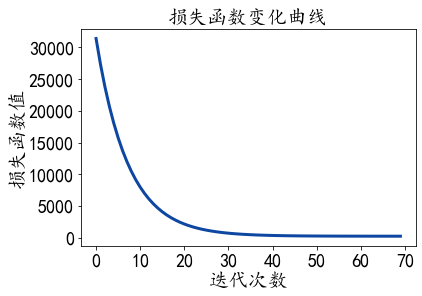

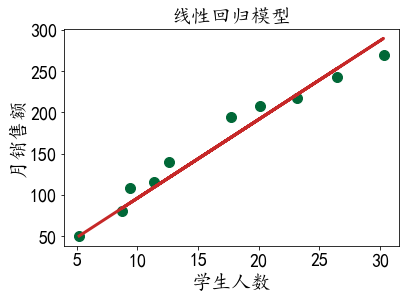

In [33]:
# 示例5：梯度下降手撕代码
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi']


# 可视化损失函数的变化
def visualiztion_cost(cost_list):
    # 绘制损失函数值
    plt.plot(cost_list, color='#0d47a1', linewidth=3)
    # 绘图设置
    plt.xticks(fontproperties='Times New Roman', size=18)
    plt.yticks(fontproperties='Times New Roman', size=18)
    plt.title('损失函数变化曲线', size=20)
    plt.xlabel('迭代次数', size=20)
    plt.ylabel('损失函数值', size=20)
    # 显示图并暂停几秒
    plt.show()
    plt.pause(2)


# 可视化拟合结果
def visualization_fitting(x, y, y_predict):
    # 绘出已知样本的散点图
    plt.scatter(x, y, color='#006837', s=100)
    # 绘出预测直线
    plt.plot(x, y_predict, color='#c62828', linewidth=3)
    # 绘图设置
    plt.xticks(fontproperties='Times New Roman', size=18)
    plt.yticks(fontproperties='Times New Roman', size=18)
    plt.title('线性回归模型', size=20)
    plt.xlabel('学生人数', size=20)
    plt.ylabel('月销售额', size=20)
    # 显示图
    plt.show()


# 计算损失函数值
def calculate_cost(theta, theta_zero, points):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - theta * x - theta_zero) ** 2
    return total_cost / M


# 梯度下降法的每一轮更新
def gradient_descent_step(current_theta, current_theta_zero, alpha, points):
    sum_grad_theta = 0
    sum_grad_theta_zero = 0
    M = len(points)
    # 每个点代入公式求和
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_grad_theta += (current_theta * x + current_theta_zero - y) * x
        sum_grad_theta_zero += current_theta * x + current_theta_zero - y
    # 计算当前梯度
    grad_theta = 2 / M * sum_grad_theta
    grad_theta_zero = 2 / M * sum_grad_theta_zero

    # 更新当前的theta和theta0
    updated_theta = current_theta - alpha * grad_theta
    updated_theta_zero = current_theta_zero - alpha * grad_theta_zero
    return updated_theta, updated_theta_zero


# 梯度下降法
def gradient_descent(points, initial_theta, initial_theta_zero, alpha, num_iter):
    theta = initial_theta
    theta_zero = initial_theta_zero
    # 保存每一轮的损失函数值
    cost_list = []
    for i in range(num_iter):
        cost_list.append(calculate_cost(theta, theta_zero, points))
        theta, theta_zero = gradient_descent_step(theta, theta_zero, alpha, points)
    return [theta, theta_zero, cost_list]


def main():
    # 用numpy读取csv
    points = np.genfromtxt("students_and_sales.csv", encoding='utf-8', delimiter=",", skip_header=1, usecols=(1, 2))
    
    # 提取points中的两列数据，分别作为x，y
    x = points[:, 0]
    y = points[:, 1]

    # 学习率设置
    alpha = 0.0001
    # 初始化
    init_theta = 0
    init_theta_zero = 0
    num_iter = 70

    # 梯度下降法求解
    theta, theta_zero, cost = gradient_descent(points, init_theta, init_theta_zero, alpha, num_iter)
    print(theta, theta_zero,cost)
    # 可视化损失函数的变化
    visualiztion_cost(cost)
    # 计算预测值
    y_hat = theta * x + theta_zero
    # 可视化拟合结果
    visualization_fitting(x, y, y_hat)


if __name__ == '__main__':
    main()

## 2、非线性拟合

No handles with labels found to put in legend.


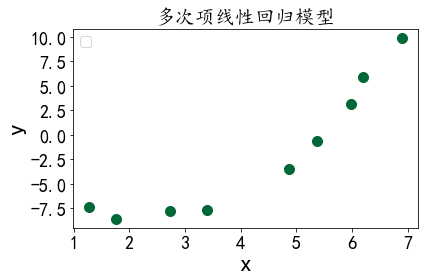

In [34]:
#示例6
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
# 创建样本
x = np.sort(np.linspace(0, 7, 9) + np.random.randn(9))
y = x ** 2 - 5 * x - 3 + np.random.randn(9)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

# 绘制原始数据
plt.scatter(x, y, color='#006837', s=100, zorder=5)


# 常规绘图项
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
plt.title('多次项线性回归模型', size=20)
plt.xlabel('x', size=24)
plt.ylabel('y', size=24)
plt.tight_layout()    
plt.show()

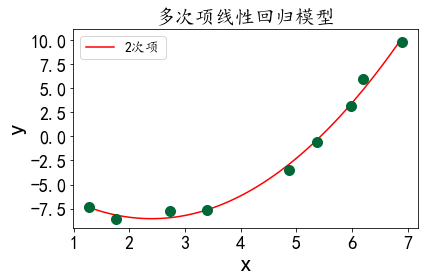

In [35]:
#示例7
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
# 创建样本
x = np.sort(np.linspace(0, 7, 9) + np.random.randn(9))
y = x ** 2 - 5 * x - 3 + np.random.randn(9)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

PF = PolynomialFeatures(degree=2)
x_poly = PF.fit_transform(x)

model = LinearRegression()
# 拟合
model.fit(x_poly, y)

# 预测结果
x_hat = np.linspace(x.min(), x.max(), num=100).reshape(-1, 1)
x_hat_poly = PF.fit_transform(x_hat)
y_hat = model.predict(x_hat_poly)

plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

# 绘制原始数据
plt.scatter(x, y, color='#006837', s=100, zorder=5)

plt.plot(x_hat, y_hat, color='r', label=(f'{2}次项'))

# 常规绘图项
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
plt.title('多次项线性回归模型', size=20)
plt.xlabel('x', size=24)
plt.ylabel('y', size=24)
plt.tight_layout()    
plt.show()


*************************************** 多次项回归 ***************************************
1次项的系数为：[-14.88, 3.05]
2次项的系数为：[-3.19, -4.47, 0.93]
3次项的系数为：[-3.75, -3.91, 0.78, 0.01]
4次项的系数为：[-10.39, 5.18, -3.25, 0.72, -0.04]
5次项的系数为：[11.37, -31.59, 19.06, -5.47, 0.75, -0.04]
6次项的系数为：[24.09, -58.36, 40.64, -14.03, 2.53, -0.22, 0.01]
7次项的系数为：[139.33, -338.43, 313.0, -151.95, 42.06, -6.67, 0.57, -0.02]
8次项的系数为：[-778.48, 2137.51, -2441.45, 1504.67, -549.87, 122.61, -16.37, 1.2, -0.04]
9次项的系数为：[-78.98, 124.79, -3.69, -133.72, 126.81, -56.34, 14.07, -2.02, 0.16, -0.01]


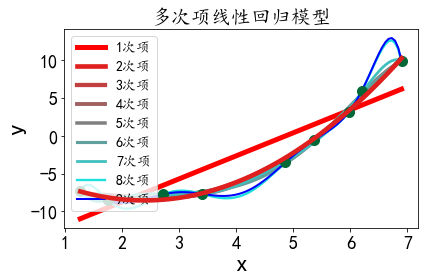

In [36]:
#示例8
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import matplotlib as mpl

#Pipeline可以将许多算法模型串联起来，
# 比如将特征提取、归一化、分类组织在一起形成一个典型的机器学习问题工作流。
#主要带来两点好处：
#直接调用fit和predict方法来对pipeline中的所有算法模型进行训练和预测。
#可以结合grid search对参数进行选择。
#多次项线性回归

# 使用 sklearn.preprocessing.PolynomialFeatures 这个类可以进行特征的构造，
#构造的方式就是特征与特征相乘（自己与自己，自己与其他人），这种方式叫做使用多项式的方式。


def linear_regression(x, y, d):
    # 创建多次项模型
    model = Pipeline([('poly', PolynomialFeatures()),
                      ('linear', LinearRegression(fit_intercept=False))])
    # 设置次数
    model.set_params(poly__degree=d)
    # 拟合
    model.fit(x, y)
    coef = model.get_params('linear')['linear'].coef_.ravel()
    coef = [round(c, 2) for c in coef]
    print(f'{d}次项的系数为：{coef}')
    # 预测结果
    x_hat = np.linspace(x.min(), x.max(), num=100).reshape(-1, 1)
    y_hat = model.predict(x_hat)
    return x_hat, y_hat


# 可视化
def fit_and_plot(x, y):
    # 设置中文显示
    mpl.rcParams['font.sans-serif'] = ['KaiTi']
    mpl.rcParams['axes.unicode_minus'] = False
    # 设置从1次项到9次项
    pool = np.arange(1, 10)
    # 设置线条颜色和粗细
    colors = []
    for c in np.linspace(16711680, 255, pool.size):
        colors.append('#%06x' % int(c))
    line_width = np.linspace(5, 2, pool.size)
    print('*' * 39, '多次项回归', '*' * 39)

    # 绘制原始数据
    plt.scatter(x, y, color='#006837', s=100, zorder=5)

    # 绘制9条拟合曲线
    for i, d in enumerate(pool):
        x_hat, y_hat = linear_regression(x, y, d)
        order = 9 if d == 2 else 0
        plt.plot(x_hat, y_hat, color=colors[i], lw=line_width[i], 
                 label=(f'{d}次项'), zorder=order)

    # 常规绘图项
    plt.legend(loc='upper left', fontsize=14)
    plt.xticks(fontproperties='Times New Roman', size=18)
    plt.yticks(fontproperties='Times New Roman', size=18)
    plt.title('多次项线性回归模型', size=20)
    plt.xlabel('x', size=24)
    plt.ylabel('y', size=24)
    plt.tight_layout()    
    plt.show()


def main():
    np.random.seed(0)
    # 创建样本
    x = np.sort(np.linspace(0, 7, 9) + np.random.randn(9))
    y = x ** 2 - 5 * x - 3 + np.random.randn(9)
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # 进行拟合并可视化
    fit_and_plot(x, y)


if __name__ == "__main__":
    main()


***************************************** Lasso回归 *****************************************
1次项，alpha=0.343时，系数为：[-12.45, 2.56]
2次项，alpha=0.000时，系数为：[-3.21, -4.46, 0.93]
3次项，alpha=0.021时，系数为：[-5.26, -2.3, 0.33, 0.05]
4次项，alpha=0.272时，系数为：[-2.16, -3.48, 0.2, 0.13, -0.01]
5次项，alpha=0.001时，系数为：[-4.92, -2.64, 0.37, 0.05, 0.0, -0.0]
6次项，alpha=0.007时，系数为：[-4.63, -2.66, 0.3, 0.05, 0.0, 0.0, -0.0]
7次项，alpha=0.135时，系数为：[-2.91, -3.06, 0.1, 0.09, 0.0, 0.0, -0.0, -0.0]
8次项，alpha=0.614时，系数为：[-0.0, -3.83, -0.02, 0.1, 0.01, 0.0, -0.0, -0.0, -0.0]
9次项，alpha=1.233时，系数为：[-0.0, -1.98, -0.64, 0.09, 0.02, 0.0, -0.0, -0.0, -0.0, -0.0]

***************************************** Ridge回归 *****************************************
1次项，alpha=0.118时，系数为：[-13.77, 2.84]
2次项，alpha=0.167时，系数为：[-2.96, -4.51, 0.93]
3次项，alpha=0.066时，系数为：[-3.68, -3.8, 0.72, 0.02]
4次项，alpha=0.298时，系数为：[-3.09, -2.46, -0.57, 0.33, -0.02]
5次项，alpha=1.353时，系数为：[-1.87, -1.93, -1.2, 0.44, -0.02, -0.0]
6次项，alpha=0.003时，系数为：[-2.43, -4.18, -1.75, 2

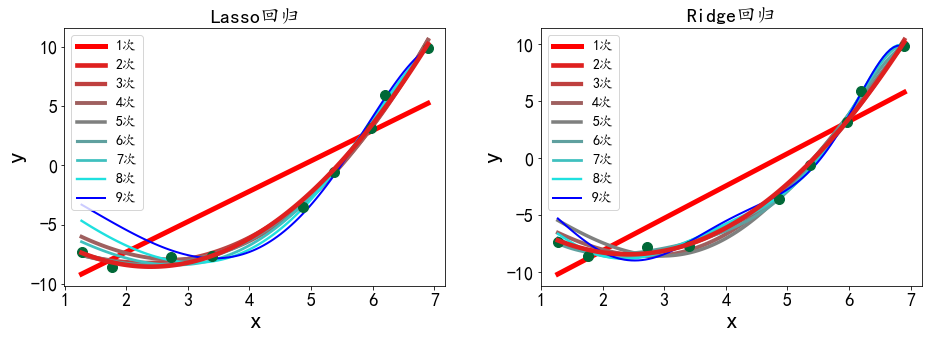

In [37]:
#示例9
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import matplotlib as mpl
from matplotlib.pyplot import MultipleLocator
import warnings

warnings.filterwarnings("ignore")


def linear_regression(x, y, d, j):
    # 创建L1正则化模型
    model_lasso = Pipeline([('poly', PolynomialFeatures()),
        ('linear', LassoCV(alphas=np.logspace(-4, 1, 100), fit_intercept=False))])
    # 创建L2正则化模型
    model_ridge = Pipeline([('poly', PolynomialFeatures()),
        ('linear', RidgeCV(alphas=np.logspace(-3, 2, 100), fit_intercept=False))])
    model = [model_lasso, model_ridge][j]
    # 设置次数
    model.set_params(poly__degree=d)
    # 拟合
    model.fit(x, y)
    linear = model.get_params('linear')['linear']
    coef = [round(c, 2) for c in linear.coef_.ravel()]
    print(f'{d}次项，alpha={linear.alpha_:.3f}时，系数为：{coef}')
    # 预测结果
    x_hat = np.linspace(x.min(), x.max(), num=100).reshape(-1, 1)
    y_hat = model.predict(x_hat)
    return x_hat, y_hat


# 可视化
def fit_and_plot(x, y):
    # 设置中文显示
    mpl.rcParams['font.sans-serif'] = ['KaiTi']
    mpl.rcParams['axes.unicode_minus'] = False
    # 设置从1次项到9次项
    pool = np.arange(1, 10)
    # 设置线条颜色和粗细
    colors = []
    for c in np.linspace(16711680, 255, pool.size):
        colors.append('#%06x' % int(c))
    line_width = np.linspace(5, 2, pool.size)

    # 开始绘图
    plt.figure(figsize=(13, 4.8), facecolor='w')
    titles = ('Lasso回归', 'Ridge回归')
    for j in range(2):
        print('*' * 41, titles[j], '*' * 41)
        # 绘制子图
        plt.subplot(1, 2, j + 1)
        # 绘制原始数据
        plt.scatter(x, y, color='#006837', s=100)

        # 绘制9条拟合曲线
        for i, d in enumerate(pool):
            x_hat, y_hat = linear_regression(x, y, d, j)
            order = 9 if d == 2 else 0
            plt.plot(x_hat, y_hat, color=colors[i], lw=line_width[i],
                     label=(f'{d}次'), zorder=order)

        # 常规绘图项
        plt.legend(loc='upper left', fontsize=14)
        y_major_locator = MultipleLocator(5)
        plt.gca().yaxis.set_major_locator(y_major_locator)
        plt.xticks(fontproperties='Times New Roman', size=18)
        plt.yticks(fontproperties='Times New Roman', size=18)
        plt.title(titles[j], size=20)
        plt.xlabel('x', size=24)
        plt.ylabel('y', size=24)
        print()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.25)    
    plt.show()


def main():
    np.random.seed(0)
    # 创建样本
    x = np.sort(np.linspace(0, 7, 9) + np.random.randn(9))
    y = x ** 2 - 5 * x - 3 + np.random.randn(9)
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # 进行拟合并可视化
    fit_and_plot(x, y)


if __name__ == "__main__":
    main()

耗资20百万的电影预计票房收入：69.95百万元
回归模型的系数： [4.78481013] <class 'numpy.ndarray'>
回归模型的截距： -25.74683544303799 <class 'numpy.float64'>
最佳拟合线: y = 4.8X-25.7


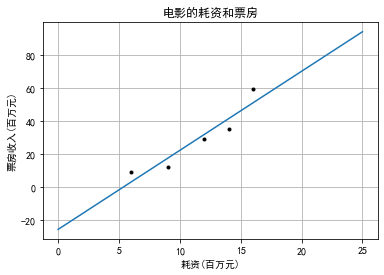

In [1]:
#sklearn一元线性回归示例1 
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.rcParams['font.sans-serif'] = ['Simhei'] 
plt.rcParams['axes.unicode_minus'] = False
X = [[6], [9], [12], [14], [16]]  #二维数据训练特征数据
y = [9, 12, 29, 35, 59]  #也可以是一维的，对模型的属性的维度有影响（降了一维）
model = linear_model.LinearRegression() #创建模型
model.fit(X, y) #训练模型
X_test= [[20]]  #测试集特征值
a = model.predict(X_test) #用测试集特征数据预测数据
print("耗资{}百万的电影预计票房收入：{:.2f}百万元".format(X_test[0][0],a[0]))
print("回归模型的系数：",model.coef_ ,type(model.coef_))
print("回归模型的截距：",model.intercept_,type(model.intercept_))   
print(f"最佳拟合线: y = {model.coef_[0]:.1f}X{model.intercept_:+.1f}") 
plt.title('电影的耗资和票房')
plt.xlabel('耗资(百万元)')
plt.ylabel('票房收入(百万元)')
plt.grid(True) 
plt.plot(X, y, 'k.')  #绘制无连线的散点图
plt.plot( [0,25], model.predict ( [ [0], [25] ] )) #两点连线
plt.show()

In [2]:
#sklearn二元线性回归示例2
import numpy as np
from sklearn import linear_model
x = np.array([[6,1,9],[9,3,12],[12,2,29],
[14,3,35],[16,4,59]]) #数据集，包括目标
X = x[:,:-1] #二维特征值(成本,广告)
y = x[:,-1]  #一维目标值(票房)
print('X:',X)
print('y:',y)
# 训练
regr = linear_model.LinearRegression()
regr.fit(X,y)
print('系数(θ1,θ2):',regr.coef_)
print('截距(θ0):',regr.intercept_)
# 预测
X_test= [[10,3]] #测试集二元特征数据
y_pred = regr.predict(X_test)
print(f'成本{X_test[0][0]}百万，推广{X_test[0][1]}百万的电影票房预测：{y_pred[0]:.1f}百万')


X: [[ 6  1]
 [ 9  3]
 [12  2]
 [14  3]
 [16  4]]
y: [ 9 12 29 35 59]
系数(θ1,θ2): [ 4.94890511 -0.70072993]
截距(θ0): -25.79562043795624
成本10百万，推广3百万的电影票房预测：21.6百万


In [3]:
#保存变量至文件、从文件载入变量——示例3
from joblib import dump,load
from sklearn import linear_model
x = np.array([[6,1,9],[9,3,12],[12,2,29],
[14,3,35],[16,4,59]]) #数据集，包括目标
X = x[:,:-1] #二维特征值(成本,广告)
y = x[:,-1]  #一维目标值(票房)
print('X:',X)
print('y:',y)
# 训练
regr = linear_model.LinearRegression()
regr.fit(X,y)
print('系数(θ1,θ2):',regr.coef_)
print('截距(θ0):',regr.intercept_)
# 预测
X_test= [[10,3]] #测试集二元特征数据
y_pred = regr.predict(X_test)
print(f'成本{X_test[0][0]}百万，推广{X_test[0][1]}百万的电影票房预测：{y_pred[0]:.1f}百万')
dump(regr, '电影经济.joblib' )
newMovie=load( '电影经济.joblib' )
print('从文件读入的对象：\n系数(θ1,θ2):',newMovie.coef_)
print('截距(θ0):',newMovie.intercept_)
y_pred = newMovie.predict(X_test)
print(f'成本{X_test[0][0]}百万，推广{X_test[0][1]}百万的电影票房预测：{y_pred[0]:.1f}百万')


X: [[ 6  1]
 [ 9  3]
 [12  2]
 [14  3]
 [16  4]]
y: [ 9 12 29 35 59]
系数(θ1,θ2): [ 4.94890511 -0.70072993]
截距(θ0): -25.79562043795624
成本10百万，推广3百万的电影票房预测：21.6百万
从文件读入的对象：
系数(θ1,θ2): [ 4.94890511 -0.70072993]
截距(θ0): -25.79562043795624
成本10百万，推广3百万的电影票房预测：21.6百万


In [4]:
#多元回归、多个目标——示例4
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array([[6,1,9,1],[9,3,12,1],[12,2,29,3],
[14,3,35,4],[16,4,59,6]]) #数据集，包括目标
X = x[:,:-2] #二维特征值 (成本,广告 )
y = x[:,-2:] #二维目标值 (票房，周边 )
# 训练
regr = LinearRegression()
regr.fit(X,y)
print('系数(θ1,θ2):\n',regr.coef_)
print('截距(θ0):\n',regr.intercept_)
X_test=[[11,2]]
y_pred=regr.predict(X_test)
print('测试集：',X_test)
print('预测值：',y_pred)

系数(θ1,θ2):
 [[ 4.94890511 -0.70072993]
 [ 0.5729927  -0.28467153]]
截距(θ0):
 [-25.79562044  -2.7919708 ]
测试集： [[11, 2]]
预测值： [[27.24087591  2.94160584]]


### 例2 广告收益预测分析(多元线性回归)
#### 数据集advertising.csv,样本数据200条，数据维度4

In [6]:
#1.从文件中读入数据，第1列是索引名
import numpy as np
import pandas as pd

filename = 'advertising.csv'
data = pd.read_csv(filename, index_col = 0)

print(data[0:5])

      TV  Weibo  WeChat  Sales
1  230.1   37.8    69.2   22.1
2   44.5   39.3    45.1   10.4
3   17.2   45.9    69.3    9.3
4  151.5   41.3    58.5   18.5
5  180.8   10.8    58.4   12.9


Text(0, 0.5, 'sales')

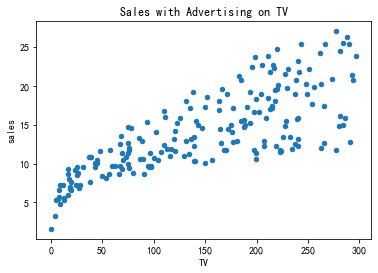

In [7]:
#2.绘制自变量与目标变量之间的散点图,电视广告与销量之间的关联
#导入绘图库
%matplotlib inline
import matplotlib.pyplot as plt

data.plot(kind='scatter',x='TV',y='Sales',title='Sales with Advertising on TV')
plt.xlabel("TV")
plt.ylabel("sales")

Text(0, 0.5, 'sales')

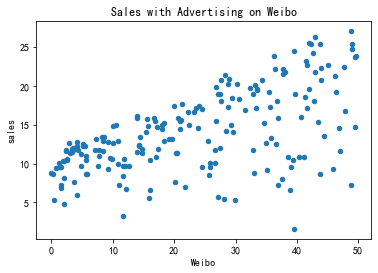

In [8]:
#微博广告与销量之间的关联
data.plot(kind='scatter',x='Weibo',y='Sales',title='Sales with Advertising on Weibo')
plt.xlabel("Weibo")
plt.ylabel("sales")

Text(0, 0.5, 'sales')

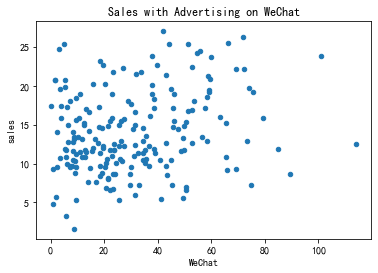

In [9]:
#微信广告与销量之间的关联
data.plot(kind='scatter',x='WeChat',y='Sales',title='Sales with Advertising on WeChat')
plt.xlabel("WeChat")
plt.ylabel("sales")

In [10]:
#3. 建立3个自变量与目标变量的线性回归模型，计算误差。
#X = data.iloc[:,0:3].values.astype(float)
#y = data.iloc[:,3].values.astype(float)
X = data[['TV', 'Weibo', 'WeChat']]
y = data.Sales
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()  
print(X.shape)
print(y.shape)
linreg.fit(X, y)
#输出线性回归模型的截距和回归系数
print (linreg.intercept_, linreg.coef_)

(200, 3)
(200,)
2.9388893694594067 [ 0.04576465  0.18853002 -0.00103749]


In [11]:
#4.保存回归模型导文件，以便后续加载使用
#from sklearn.externals import joblib
import joblib
joblib.dump(linreg, 'linreg.pkl')   #保存至文件

#重新加载预测数据
import numpy as np
load_linreg = joblib.load('linreg.pkl')  #从文件读取模型
new_X = np.array([[130.1,87.8,69.2]])
print("6月广告投入：",new_X)
print("预期销售：",load_linreg.predict(new_X) ) #使用模型预测

6月广告投入： [[130.1  87.8  69.2]]
预期销售： [25.37401071]


In [12]:
#5.回归模型的性能评估

#5.1 将数据集分割为训练集和测试集
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.35, random_state=1)

#5.2 在训练集上学习回归模型，在训练集和测试集上计算误差。
linregTr = LinearRegression() 
linregTr.fit(X_train, y_train)
print (linregTr.intercept_, linregTr.coef_)

#5.3 计算模型性能
from sklearn import metrics
y_train_pred = linregTr.predict(X_train)
y_test_pred = linregTr.predict(X_test)
train_err = metrics.mean_squared_error(y_train, y_train_pred) 
test_err = metrics.mean_squared_error(y_test, y_test_pred) 
print( 'The mean squar error of train and test are: {:.2f}, {:.2f}'.format(train_err, test_err) )

predict_score =linregTr.score(X_test,y_test)
print('The decision coeficient is:{:.2f} '.format(predict_score) )
 
#5.4 使用所有数据训练的模型性能测试
predict_score1 =linreg.score(X_test,y_test)
print('The decision coeficient of model trained with all is: {:.2f} '.format(predict_score1) )
y_test_pred1 = linreg.predict(X_test)
test_err1 = metrics.mean_squared_error(y_test, y_test_pred1) 
print( 'The mean squar error of test with all: {:.2f}'.format(test_err1) )

2.932471346604091 [0.04608839 0.18047646 0.00411699]
The mean squar error of train and test are: 3.06, 2.32
The decision coeficient is:0.91 
The decision coeficient of model trained with all is: 0.92 
The mean squar error of test with all: 2.23
